In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib import colors
np.random.seed(0)

In [2]:
WALL_PENALTY = -10
MOVE_PENALTY = -1
GOAL_REWARD = 0

NOISE = 0

ACTIONS = ["up", "down", "left", "right", "stay"] 
WALL_CONFIG = [
    (0, 1),
    (1, 1),
    (2, 1),
    (3, 1),
    (6, 1),
    (5, 2),
    (4, 3),
    (3, 3),
    (2, 3),
    (1, 4),
    (1, 5),
    (3, 6),
    (4, 5),
]


In [3]:
# Helper function to get our Maze
def get_initial_grid(n):
    grid = []
    reward = []
    value = np.zeros((n, n))
    for i in range(0, n):
        gridline = []
        rewardline = []
        for j in range(0, n):
            match = False
            if (i == 0 and j == 0):
                gridline.append("St")
                rewardline.append(-1)
            elif ( i == n - 1 and j == n - 1):
                gridline.append("Go")
                rewardline.append(0)
            else:
                for wall in WALL_CONFIG:
                    if wall[0] == i and wall[1] == j:
                        match = True 
                if match:
                    gridline.append("W")
                    rewardline.append(-10)
                else:
                    gridline.append("_")
                    rewardline.append(-1)

        grid.append(list(gridline))
        reward.append(list(rewardline))
    return grid, reward, value

In [4]:
# Helper function to print our Maze

def display_initial_grid(reward):
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-10, -1, 0, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(reward, cmap=cmap, norm=norm)

In [5]:
grid, reward_mat, value = get_initial_grid(7)

In [6]:
# Function to get our new state based on the current state and action we are taking
def get_new_state(state, action):
    i, j = state
    if action == "up":
        if i - 1 >= 0 and (i - 1, j) not in WALL_CONFIG:
            return (i - 1, j)
        
    if action == "down":
        if i + 1 <= 6 and  (i + 1, j) not in WALL_CONFIG:
            return (i + 1, j)
        
    if action == "left":
        if j - 1 >= 0 and (i, j - 1) not in WALL_CONFIG:
            return (i, j - 1)
        
    if action == "right":
        if j + 1 <= 6 and (i, j + 1) not in WALL_CONFIG:
            return (i, j + 1)
    return (i, j)

# This function gives us the reward based on our actions.
def get_rewards(new_state):
    i, j = new_state
    if (i, j) in WALL_CONFIG:
        return -1000
    elif (i, j) == (6, 6):
        return 0
    else: 
        return -1


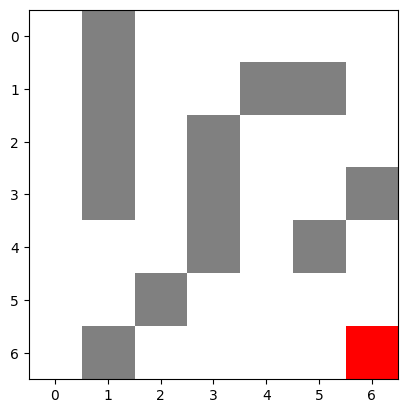

In [7]:
display_initial_grid(reward_mat)

## Problem: You are In a Maze. Your task is to reach the Goal State with as much reward as possible.

You start at initial position 0,0. Your task is to reach the goal state (6,6). The gray lines are walls.

If you run into a wall you will get reward of -1000 and your position will stay the same as before. The reward at goal state is 0. For reaching all other states the reward is -1.

You can perform 5 Actions: __up, down, left, right, stay__. Look at the __ACTIONS__ variable. Each Action has an index associated with it as per the ACTIONS variable. For example Up is 0, Down is 1 and so on.


You have to use two algorithms: SARSA and Value Iteration to solve the problem.


The framework for the environment has been created.

To get the new state when at state __S__ and taking action __A__. Call the function __get_new_state(s,a)__.

To get the reward for reaching new state __S__, call the function __get_reward(S)__.

You can also refer to the Demo Notebook to get more clarity on how to use the Environment.


In [8]:
# These are the actions you have. You can use this variables to get the number each one is associated with.
ACTIONS

['up', 'down', 'left', 'right', 'stay']

In [9]:
# Action we should take according to Q-Table
def get_action(tbl, x, y, epsilon, num_actions):
    if (np.random.random() < epsilon):
        return np.random.randint(num_actions)
    else:
        return np.argmax(tbl[x][y])

### Q 1) SARSA:

#### Q 1.1) Implement SARSA and run the solution.

In [10]:
q_table = np.zeros([7, 7, len(ACTIONS)])

In [11]:
def sarsa(q_table, x, y, x2, y2, action_idx, reward, learning_rate, discount):
    current_q_val = q_table[x, y, action_idx]
    # sarsa ~ target policy is the same as behavior policy
    target_q_val = (reward + (discount * q_table[x2, y2, action_idx])) - current_q_val
    updated_q_val = current_q_val + (learning_rate * target_q_val)
    return updated_q_val

In [12]:
total_episodes = 10000
max_steps = 100
num_actions = len(ACTIONS)
alpha = 0.7 # Learning Rate
epsilon = 0.09 # Exploration probability
gamma = 0.9

for episode in range(total_episodes):
    x, y = 0, 0
    total_reward = 0
    for step in range(max_steps):
        act_idx = get_action(q_table, x, y, epsilon, num_actions)
        new_state = get_new_state((x, y), ACTIONS[act_idx])
        new_x, new_y = new_state
        reward = get_rewards(new_state)
        total_reward += reward
        
        # On Policy
        q_table[x, y, act_idx] = sarsa(q_table, x, y, new_x, new_y, act_idx, reward, alpha, gamma)

        x, y = new_x, new_y
        
        if x >= 6 and y >= 6:
            print("Goal Reached. Reward recieved: " + str(total_reward))
            break

Goal Reached. Reward recieved: -97
Goal Reached. Reward recieved: -71
Goal Reached. Reward recieved: -95
Goal Reached. Reward recieved: -63
Goal Reached. Reward recieved: -90
Goal Reached. Reward recieved: -62
Goal Reached. Reward recieved: -70
Goal Reached. Reward recieved: -68
Goal Reached. Reward recieved: -58
Goal Reached. Reward recieved: -61
Goal Reached. Reward recieved: -70
Goal Reached. Reward recieved: -52
Goal Reached. Reward recieved: -54
Goal Reached. Reward recieved: -40
Goal Reached. Reward recieved: -43
Goal Reached. Reward recieved: -48
Goal Reached. Reward recieved: -84
Goal Reached. Reward recieved: -54
Goal Reached. Reward recieved: -39
Goal Reached. Reward recieved: -49
Goal Reached. Reward recieved: -39
Goal Reached. Reward recieved: -39
Goal Reached. Reward recieved: -44
Goal Reached. Reward recieved: -39
Goal Reached. Reward recieved: -45
Goal Reached. Reward recieved: -37
Goal Reached. Reward recieved: -34
Goal Reached. Reward recieved: -34
Goal Reached. Reward

In [13]:
# Helper functions to plot our Policy.

def get_arrow(index):
    if index == 0:
        return r"$\uparrow$"
    elif index == 1:
        return r"$\downarrow$"
    elif index == 2:
        return r"$\leftarrow$"
    elif index == 3:
        return r"$\rightarrow$"
    elif index == 4:
        return r"$\circlearrowleft$"
    
def plot_optimal_actions(data, q_table):

    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-11, -2, 0, 12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax1 = plt.subplots(1,1, figsize=(10, 10))
    ax1.imshow(data, cmap=cmap, norm=norm)
    
    ax1.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax1.set_xticks(np.arange(-.5, 7, 1))
    ax1.set_yticks(np.arange(-.5, 7, 1))

    for i in range(7):
        for j in range(7):
            arrow = get_arrow(np.argmax(q_table[i][j]))
            text = ax1.text(j, i, arrow, fontsize=12, ha="center", va="center", color="black")

    fig.tight_layout()

#### Q 1.2) Plot the Policy. You can use above helper functions if you want

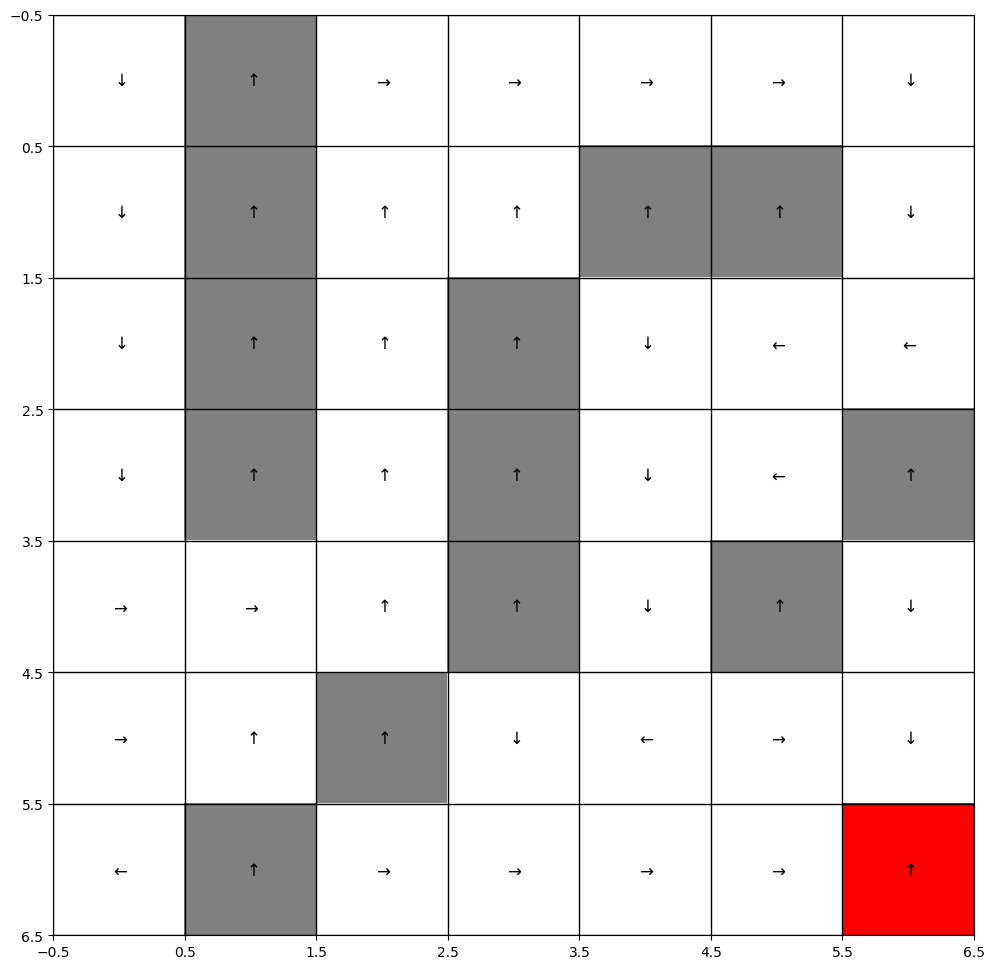

In [14]:
plot_optimal_actions(reward_mat, q_table)